In [45]:
import os
import datetime
import pandas as pd
import matplotlib.pyplot as plt

current_time = datetime.datetime.now()
current_time_str = current_time.strftime("%Y%m%d%H%M%S")
model_weight_sizes = {
    "Llama-2-13b-chat-hf": 13,
    "Mistral-7B-Instruct-v0.2": 7,
    "Llama-2-70b-chat-hf": 70,
    "Meta-Llama-3-8B-Instruct": 8,
    "Llama-2-7b-chat-hf": 7,
    "Mixtral-8x7B-Instruct-v0.1": 56,
}

folder_path = "Paper Experiment Results/New_filtered/creativity"
output_photo_name = f"CT_{current_time_str}.svg"
output_photo_path = os.path.join(folder_path, output_photo_name)
all_dfs = []
for filename in os.listdir(folder_path):
    if filename.endswith(".csv") and "evaluated" in filename:
        file_path = os.path.join(folder_path, filename)
        df = pd.read_csv(file_path)
        model_name = filename.split("_")[2]
        df["model_name"] = model_name
        df["weight_size"] = model_weight_sizes.get(model_name, None)
        all_dfs.append(df)

df = pd.concat(all_dfs, ignore_index=True)


def label_function(x):
    if str(x).startswith("Yes"):
        return True
    elif str(x).startswith("No"):
        return False
    else:
        return None


df["label"] = df["OpenAI_response"].apply(label_function)
df = df[~df["label"].isna()]
df = df[df["Temperature"] != "temperature"]
df["Temperature"] = df["Temperature"].astype(float).round(1)

model_map = {
    "Llama-2-7b-chat-hf": 0,
    "Llama-2-13b-chat-hf": 1,
    "Llama-2-70b-chat-hf": 2,
    "Meta-Llama-3-8B-Instruct": 3,
    "Meta-Llama-3-70B-Instruct": 4,
    "Mistral-7B-Instruct-v0.2": 5,
    "Mixtral-8x7B-Instruct-v0.1": 6,
}

df["pure_response"] = df["pure_response"].astype(str)
df["pure_response_length"] = df["pure_response"].apply(len)
df["time_per_char"] = df["elapsed_time"] / df["pure_response_length"]
df["initial_prompt_length"] = df["formatted_prompt"].apply(len)
df["Temperature"] = df["Temperature"].round(1)
df["model_encoded"] = df["model_name"].map(model_map)
node_labels = [
    "Temperature",
    "model_encoded",
    "initial_prompt_length",
    "label",
]
creativity_df = df[node_labels].copy()

In [46]:
import os
import datetime
import pandas as pd
import matplotlib.pyplot as plt
import os
import datetime
import pandas as pd
import matplotlib.pyplot as plt

current_time = datetime.datetime.now()
current_time_str = current_time.strftime("%Y%m%d%H%M%S")
output_photo_name = f"IF_{current_time_str}.svg"
model_weight_sizes = {
    "Llama-2-13b-chat-hf": 13,
    "Mistral-7B-Instruct-v0.2": 7,
    "Llama-2-70b-chat-hf": 70,
    "Meta-Llama-3-8B-Instruct": 8,
    "Llama-2-7b-chat-hf": 7,
    "Mixtral-8x7B-Instruct-v0.1": 56,
}

model_map = {
    "Llama-2-7b-chat-hf": 0,
    "Llama-2-13b-chat-hf": 1,
    "Llama-2-70b-chat-hf": 2,
    "Meta-Llama-3-8B-Instruct": 3,
    "Meta-Llama-3-70B-Instruct": 4,
    "Mistral-7B-Instruct-v0.2": 5,
    "Mixtral-8x7B-Instruct-v0.1": 6,
}

marker_map = {
    "Llama-2-7b-chat-hf": ".",
    "Llama-2-13b-chat-hf": "*",
    "Llama-2-70b-chat-hf": "o",
    "Meta-Llama-3-8B-Instruct": "+",
    "Meta-Llama-3-70B-Instruct": "^",
    "Mistral-7B-Instruct-v0.2": "<",
    "Mixtral-8x7B-Instruct-v0.1": ">",
}

color_map = {
    "Llama-2-7b-chat-hf": "C0",
    "Llama-2-13b-chat-hf": "C1",
    "Llama-2-70b-chat-hf": "C2",
    "Meta-Llama-3-8B-Instruct": "C3",
    "Meta-Llama-3-70B-Instruct": "C4",
    "Mistral-7B-Instruct-v0.2": "C5",
    "Mixtral-8x7B-Instruct-v0.1": "C6",
}

folder_path = "Paper Experiment Results/New_filtered/IF"
output_photo_name = f"IF_{current_time_str}.svg"
output_photo_path = os.path.join(folder_path, output_photo_name)
all_dfs = []
for filename in os.listdir(folder_path):
    if filename.endswith(".csv") and "evaluated" in filename:
        file_path = os.path.join(folder_path, filename)
        df = pd.read_csv(file_path)
        model_name = filename.split("_")[2]
        df["model_name"] = model_name
        df["weight_size"] = model_weight_sizes.get(model_name, None)
        all_dfs.append(df)

df = pd.concat(all_dfs, ignore_index=True)
df["model_encoded"] = df["model_name"].map(model_map)
df["Temperature"] = df["Temperature"].astype(float).round(1)
df = df[~df["eval"].str.contains("None", na=False)]


def count_true_false(string):
    string_lower = string.lower()
    count_true = string_lower.count("true")
    count_false = string_lower.count("false")
    return count_true, count_false


df[["true_count", "false_count"]] = df["eval"].apply(count_true_false).apply(pd.Series)
df["DRFR"] = df["true_count"] / (df["true_count"] + df["false_count"])
df["initial_prompt_length"] = df["initial_prompt"].apply(len)
node_labels = [
    "Temperature",
    "model_encoded",
    "initial_prompt_length",
    "DRFR",
]

IF_df = df[node_labels]

In [47]:
creativity_df.columns

creativity_df["label"] = creativity_df["label"].astype(int)

In [48]:
IF_df.columns

Index(['Temperature', 'model_encoded', 'initial_prompt_length', 'DRFR'], dtype='object')

In [49]:
merged_df = pd.merge(creativity_df, IF_df, on=["Temperature", "model_encoded"])
print(merged_df)

         Temperature  model_encoded  initial_prompt_length_x  label  \
0                0.1              5                     4191      1   
1                0.1              5                     4191      1   
2                0.1              5                     4191      1   
3                0.1              5                     4191      1   
4                0.1              5                     4191      1   
...              ...            ...                      ...    ...   
4103563          1.9              0                     5290      0   
4103564          1.9              0                     5290      0   
4103565          1.9              0                     5290      0   
4103566          1.9              0                     5290      0   
4103567          1.9              0                     5290      0   

         initial_prompt_length_y      DRFR  
0                            469  0.666667  
1                            263  1.000000  
2           

In [38]:
correlation = merged_df["label"].corr(merged_df["DRFR"])
print(f"Correlation between label and DRFR: {correlation}")

Correlation between label and DRFR: 0.006442518442261176


In [39]:
import statsmodels.api as sm

X = merged_df[["label"]]
y = merged_df["DRFR"]
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   DRFR   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     170.3
Date:                Thu, 13 Jun 2024   Prob (F-statistic):           6.28e-39
Time:                        00:25:42   Log-Likelihood:            -2.7778e+05
No. Observations:             4103568   AIC:                         5.556e+05
Df Residuals:                 4103566   BIC:                         5.556e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7410      0.000   4016.220      0.0

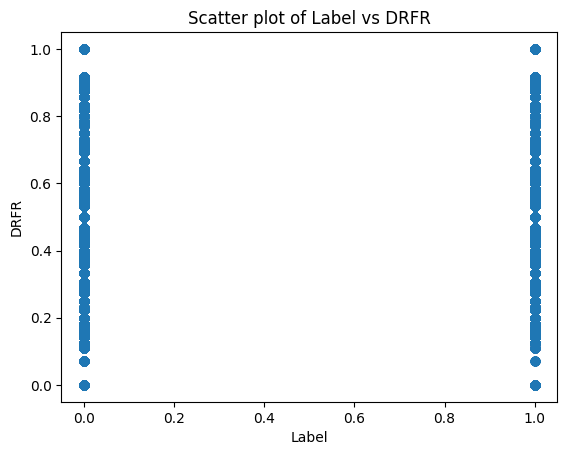

In [40]:
import matplotlib.pyplot as plt

plt.scatter(merged_df["label"], merged_df["DRFR"])
plt.xlabel("Label")  # 标准化处理
scaler = StandardScaler()
X = scaler.fit_transform(X)

# 使用 LinearDML 模型
est = LinearDML(
    model_y=RandomForestRegressor(),
    model_t=RandomForestRegressor(),
    linear_first_stages=False,
)

# 训练模型
est.fit(Y, D, X)

# 估计因果效应
treatment_effects = est.effect(X)
print("Estimated Treatment Effects:", treatment_effects)

# 打印平均处理效应（ATE）
ate = est.ate(X)
print("Average Treatment Effect (ATE):", ate)
plt.ylabel("DRFR")
plt.title("Scatter plot of Label vs DRFR")
plt.show()
import pandas as pd
from econml.dml import LinearDML
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler

In [74]:
import graphviz
import numpy as np


def make_prior_knowledge_graph(prior_knowledge_matrix, labels):
    d = graphviz.Digraph(engine="dot")

    for label in labels:
        d.node(label, label)

    dirs = np.where(prior_knowledge_matrix > 0)
    for to, from_ in zip(dirs[0], dirs[1]):
        d.edge(labels[from_], labels[to])

    dirs = np.where(prior_knowledge_matrix < 0)
    for to, from_ in zip(dirs[0], dirs[1]):
        if to != from_:
            d.edge(labels[from_], labels[to], style="dashed")
    return d

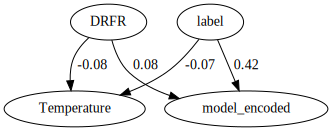

In [86]:
import pandas as pd
from causallearn.search.ConstraintBased.PC import pc
from causallearn.utils.GraphUtils import GraphUtils
import matplotlib.pyplot as plt
from collections import OrderedDict
import warnings
from causallearn.search.ConstraintBased.PC import pc
from causallearn.utils.GraphUtils import GraphUtils
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import io
import numpy as np
from castle.algorithms import PC, ICALiNGAM, GOLEM
import matplotlib.pyplot as plt
from castle.algorithms import ANMNonlinear
from causallearn.search.ScoreBased.GES import ges
from causallearn.search.FCMBased import lingam
from lingam.utils import make_prior_knowledge, make_dot

node_labels = ["Temperature", "model_encoded", "DRFR", "label"]
data = merged_df[node_labels].values

# cg = ges(data)
# pyd = GraphUtils.to_pydot(cg["G"], labels=node_labels)
# tmp_png = pyd.create_png(f="png")
# fp = io.BytesIO(tmp_png)
# img = mpimg.imread(fp, format="png")
# plt.axis("off")
# plt.imshow(img)
# plt.show()

prior_knowledge = make_prior_knowledge(n_variables=4)

prior_knowledge[0, 2] = 0
prior_knowledge[0, 3] = 0
prior_knowledge[1, 2] = 0
prior_knowledge[1, 3] = 0
prior_knowledge[0, 1] = 0
prior_knowledge[1, 0] = 0

model = lingam.DirectLiNGAM(prior_knowledge)
model.fit(data)
from causallearn.search.FCMBased.lingam.utils import make_dot


make_dot(model.adjacency_matrix_, labels=node_labels)

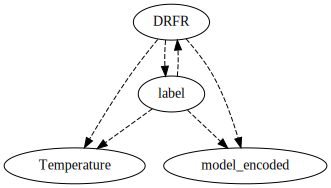

In [84]:
make_prior_knowledge_graph(prior_knowledge, labels=node_labels)

In [80]:
prior_knowledge

array([[-1,  0,  0,  0, -1],
       [ 0, -1,  0,  0, -1],
       [-1, -1, -1, -1, -1],
       [-1, -1, -1, -1, -1],
       [-1, -1, -1, -1, -1]])

In [62]:
merged_df.label.value_counts()

label
1    2134185
0    1969383
Name: count, dtype: int64